In [1]:
!ls *.pkl

CHISQpmc10.pkl SUMpmc10.pkl   THETApmc10.pkl


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [44]:
pathname = str('/Users/carly/CODE/model2.0/storeresults/')
modelpath = str('/Users/carly/CODE/model2.0/')
#savepath = str('/Users/carly/Desktop/')

In [5]:
def readchi(name):
    chiread = pd.read_pickle('CHISQ'+name+'.pkl')
    return chiread
def readtheta(name):
    thetaread = pd.read_pickle('THETA'+name+'.pkl')
    return thetaread
def readsum(name):
    sumread  = pd.read_pickle('SUM'+name+'.pkl')
    return sumread

In [7]:
mc1 = str('pmc10')

In [8]:
mc1sum = readsum(mc1)
mc1theta = readtheta(mc1)
mc1chi = readchi(mc1)

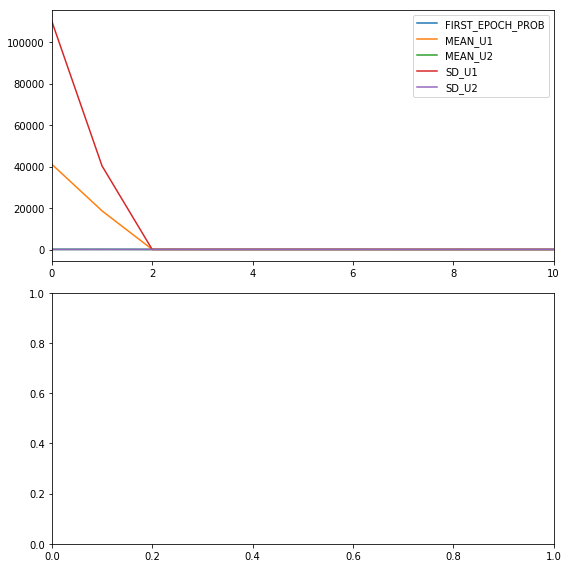

In [29]:
fig, axs = plt.subplots(2)

mc1sum.plot.line(ax = axs[0])

fig.set_size_inches(8,8)
fig.tight_layout()
fig.get_figure()

#fig.savefig(savepath+'',dpi=100)

In [30]:
mc1sum.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11 entries, 0 to 10
Data columns (total 5 columns):
FIRST_EPOCH_PROB    11 non-null float64
MEAN_U1             11 non-null float64
MEAN_U2             11 non-null float64
SD_U1               11 non-null float64
SD_U2               11 non-null float64
dtypes: float64(5)
memory usage: 528.0 bytes


In [31]:
allchi = mc1sum.sum(axis=1)
allchi.idxmin()

9

In [32]:
def kc(dic):
    s1 = dic
    for key, value in s1.items():
        # do something with value
        s1[key] = value
    return s1

In [51]:
#thetakc = pd.DataFrame.from_records(dfc3theta['KC'])

In [34]:
steps = len(mc1sum)
x0 = np.arange(0,steps)

In [35]:
theta = mc1theta
theta

,alpha,beta,gamma,kb,kc,ks,mu,sigma,tau_a,tau_u
0,0.0,1.425280,2.077030,0.109369,0.002536,0.191859,0.900000,0.041982,1248.000000,10.000000
1,0.0,1.417300,1.940792,0.115301,0.002532,0.193961,0.901640,0.046112,1163.845602,10.858931
2,0.0,1.378784,1.821658,0.114171,0.002423,0.218720,0.845840,0.046918,1185.068051,9.902784
3,0.0,1.413915,1.843652,0.113307,0.002485,0.232024,0.875625,0.046080,1151.882185,9.483346
4,0.0,1.413915,1.843652,0.113307,0.002485,0.232024,0.875625,0.046080,1151.882185,9.483346
5,0.0,1.413915,1.843652,0.113307,0.002485,0.232024,0.875625,0.046080,1151.882185,9.483346
6,0.0,1.413915,1.843652,0.113307,0.002485,0.232024,0.875625,0.046080,1151.882185,9.483346
7,0.0,1.314836,2.085716,0.113970,0.002691,0.228961,0.915827,0.046533,1153.183269,9.775146
8,0.0,1.314836,2.085716,0.113970,0.002691,0.228961,0.915827,0.046533,1153.183269,9.775146
9,0.0,1.361625,2.044118,0.116356,0.002563,0.232233,0.987767,0.046757,1208.711996,8.590873


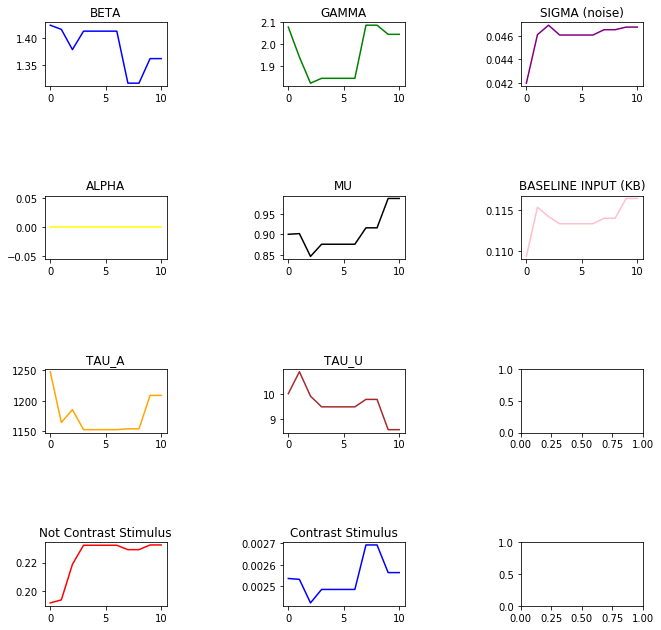

In [37]:
theta = mc1theta
fig,ax = plt.subplots(4,3)

ax[0,0].plot(x0,theta['beta'],color='blue',label='BETA')
ax[0,1].plot(x0,theta['gamma'],color='green',label='GAMMA')
ax[0,2].plot(x0,theta['sigma'],color='purple',label='SIGMA')
ax[1,0].plot(x0,theta['alpha'],color='yellow',label='ALPHA')
ax[1,1].plot(x0,theta['mu'],color='black',label='MU')
ax[1,2].plot(x0,theta['kb'],color='pink',label='BASELINE INPUT (KB)')
ax[2,0].plot(x0,theta['tau_a'],color='orange',label='TAU_A')
ax[2,1].plot(x0,theta['tau_u'],color='brown',label='TAU_U')
ax[3,0].plot(x0,theta['ks'],color='red',label='not from contrast')
ax[3,1].plot(x0,theta['kc'],color='blue',label='contrast')


ax[0,0].set_title('BETA')
ax[0,1].set_title('GAMMA')
ax[0,2].set_title('SIGMA (noise)')
ax[1,0].set_title('ALPHA')
ax[1,1].set_title('MU')
ax[1,2].set_title('BASELINE INPUT (KB)')
ax[2,0].set_title('TAU_A')
ax[2,1].set_title('TAU_U')
ax[3,0].set_title('Not Contrast Stimulus')
ax[3,1].set_title('Contrast Stimulus')

fig.tight_layout()
fig.get_figure()
fig.set_size_inches(10,10)
#fig.savefig(savepath+'', dpi=100)

In [38]:
chicol = ['CHI: First Epoch Probability',
          'CHI: U1 Mean Dominance Time',
          'CHI: U2 Mean Dominance Time',
          'CHI: U1 std for CV=0.6',
          'CHI: U2 std for CV=0.6'
         ]

In [39]:
best = allchi.idxmin()

In [40]:
dfbest = pd.DataFrame(mc1chi[best])
chiallsave = dfbest.T
chiallsave.columns = chicol
#chiallsave.index.name = 1
chiallsave

,CHI: First Epoch Probability,CHI: U1 Mean Dominance Time,CHI: U2 Mean Dominance Time,CHI: U1 std for CV=0.6,CHI: U2 std for CV=0.6
0,1.537600,1.949573,2.106771,8.223961,8.397136
20,11.488532,2.103887,2.294525,8.118288,8.405836
40,8.462810,2.769043,2.410056,9.432490,9.304464
60,6.656400,4.150549,2.734128,9.486872,8.609077
80,3.610000,5.024714,2.798258,10.699873,9.537480


In [43]:
thetasave = mc1theta.iloc[best]
thetasave

alpha       0.000000
beta        1.361625
gamma       2.044118
kb          0.116356
kc          0.002563
ks          0.232233
mu          0.987767
sigma       0.046757
tau_a    1208.711996
tau_u       8.590873
Name: 9, dtype: float64

In [45]:
#thetasave.to_pickle(pathname+'IP1.pkl')
#thetasave.to_pickle(modelpath+'IP1.pkl')

In [46]:
colsum = dfbest.sum(axis=1)
colsum['CHI SUM'] = colsum.sum()
colsum

FIRST_EPOCH_PROB     31.755342
MEAN_U1              15.997766
MEAN_U2              12.343737
SD_U1                45.961482
SD_U2                44.253993
CHI SUM             150.312320
dtype: float64

In [9]:
x = np.linspace(0, 2 * np.pi, 400)
z = np.linspace(0, 4 * np.pi, 400)
y = np.sin(x ** 2)

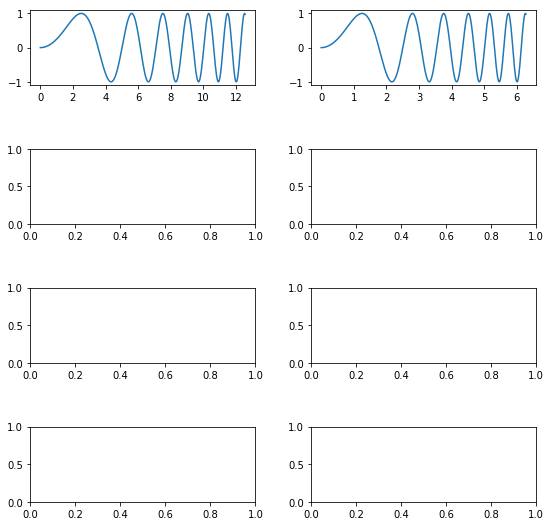

In [39]:
fig, ax = plt.subplots(4,2)
#figsize=(10,14)

ax[0,0].plot(z,y)
ax[0,1].plot(x,y)

fig.get_figure()
fig.tight_layout()
fig.set_size_inches(8,8)